In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [150]:
squad_data = pd.read_csv('IPLSquadData.csv',index_col=0)
tables_data = pd.read_csv('IPLTablesData.csv',index_col=0)

In [148]:
squad_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 951
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    952 non-null    object 
 1   Role      952 non-null    object 
 2   Price     952 non-null    float64
 3   Team      952 non-null    object 
 4   Year      952 non-null    int64  
 5   Origin    952 non-null    object 
 6   Retained  952 non-null    object 
 7   C/U/A     952 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 66.9+ KB


In [149]:
squad_data.head()

,Player,Role,Price,Team,Year,Origin,Retained,C/U/A
0,Ravindra Jadeja,All-Rounder,16.00,CSK,2022,Indian,Yes,Capped
1,Deepak Chahar,Bowler,14.00,CSK,2022,Indian,No,Capped
2,MS Dhoni,Wicket-Keeper,12.00,CSK,2022,Indian,Yes,Capped
3,Moeen Ali,All-Rounder,8.00,CSK,2022,Overseas,Yes,Capped
4,Ambati Rayudu,Wicket-Keeper,6.75,CSK,2022,Indian,No,Capped


In [151]:
squad_data.nunique()

Player      400
Role          6
Price        99
Team         10
Year          4
Origin        2
Retained      2
C/U/A         3
dtype: int64

In [152]:
squad_data['Role'].unique()

array(['All-Rounder', 'Bowler', 'Wicket-Keeper', 'Batsman',
       'Wicket-keeper', 'Batter'], dtype=object)

In [155]:
squad_data['Role'] = squad_data['Role'].str.strip().str.title().str.replace('Batter', 'Batsman')
squad_data['Role'].unique()

array(['All-Rounder', 'Bowler', 'Wicket-Keeper', 'Batsman'], dtype=object)

In [157]:
tables_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  40 non-null     int64  
 1   Team      40 non-null     object 
 2   P         40 non-null     int64  
 3   W         40 non-null     int64  
 4   L         40 non-null     int64  
 5   T         40 non-null     int64  
 6   NR        40 non-null     int64  
 7   PTS       40 non-null     int64  
 8   NRR       40 non-null     float64
 9   Year      40 non-null     int64  
 10  Q1        8 non-null      object 
 11  E         8 non-null      object 
 12  Q2        8 non-null      object 
 13  F         8 non-null      object 
dtypes: float64(1), int64(8), object(5)
memory usage: 4.7+ KB


In [158]:
tables_data.head()

,Position,Team,P,W,L,T,NR,PTS,NRR,Year,Q1,E,Q2,F
0,1,GT,14,10,4,0,0,20,0.316,2022,W,NaN,NaN,W
1,2,RR,14,9,5,0,0,18,0.298,2022,L,NaN,W,L
2,3,LSG,14,9,5,0,0,18,0.251,2022,NaN,L,NaN,NaN
3,4,RCB,14,8,6,0,0,16,-0.253,2022,NaN,W,L,NaN
4,5,DC,14,7,7,0,0,14,0.204,2022,NaN,NaN,NaN,NaN


In [159]:
tables_data.nunique()

Position    10
Team        10
P            1
W            7
L            8
T            1
NR           3
PTS         11
NRR         40
Year         4
Q1           2
E            2
Q2           2
F            2
dtype: int64

In [160]:
team_spend_by_year = squad_data.groupby(['Year', 'Team'])['Price'].sum().reset_index()
team_spend_by_year.head()

,Year,Team,Price
0,2022,CSK,87.05
1,2022,DC,86.40
2,2022,GT,89.85
3,2022,KKR,81.55
4,2022,LSG,89.20


In [161]:
spend_v_rank_df = pd.merge(team_spend_by_year,tables_data[['Team','Year','Position']],on=['Year','Team'],how='inner')
spend_v_rank_df.head()

,Year,Team,Price,Position
0,2022,CSK,87.05,9
1,2022,DC,86.40,5
2,2022,GT,89.85,1
3,2022,KKR,81.55,7
4,2022,LSG,89.20,3


In [176]:
variation_per_year = spend_v_rank_df.groupby('Year')['Price'].agg(
    mean='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

variation_per_year['range'] = variation_per_year['max'] - variation_per_year['min']
variation_per_year['coefficient_of_variation'] = variation_per_year['std'] / variation_per_year['mean']

variation_per_year

,Year,mean,std,min,max,range,coefficient_of_variation
0,2022,87.59,2.762326,81.55,89.90,8.35,0.031537
1,2023,91.05,3.451006,82.80,94.95,12.15,0.037902
2,2024,96.73,3.237557,90.10,99.80,9.70,0.033470
3,2025,118.24,3.756757,107.95,119.95,12.00,0.031772


<Figure size 1200x800 with 0 Axes>

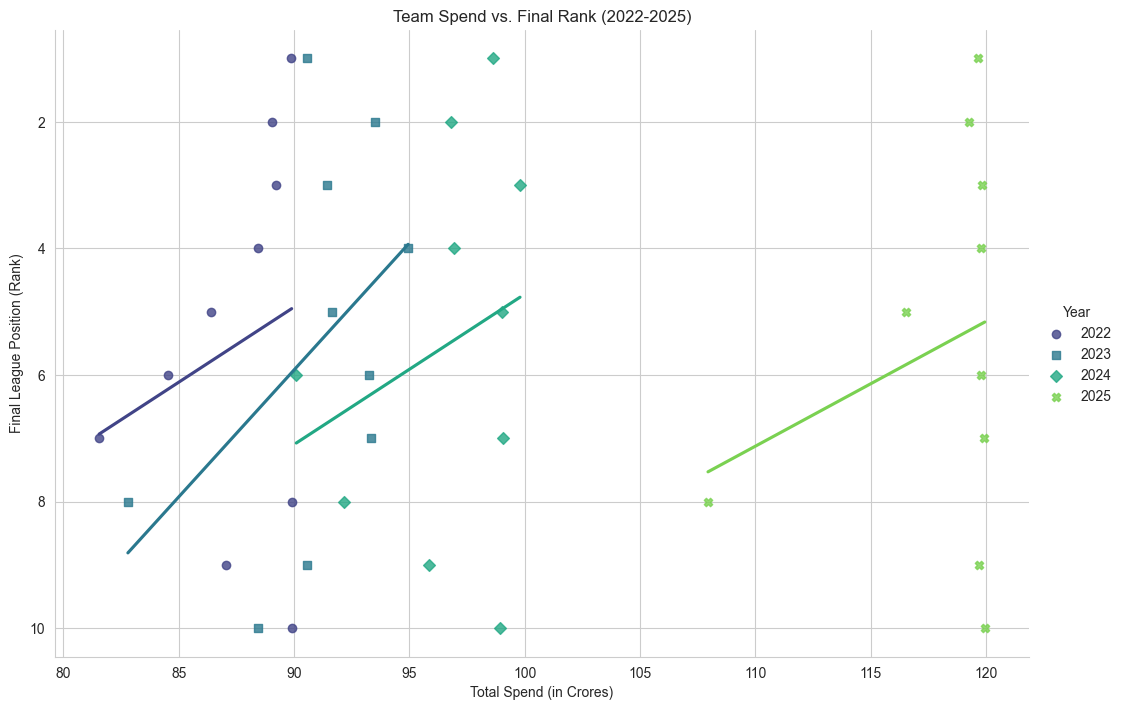

In [185]:
plt.figure(figsize=(12, 8))
sns.set_style(style='whitegrid')

plot = sns.lmplot(
    data=spend_v_rank_df,
    x='Price',
    y='Position',
    hue='Year',
    palette='viridis',
    height=7,
    aspect=1.5,
    markers=['o', 's', 'D', 'X'][:len(spend_v_rank_df['Year'].unique())],
    ci=None
)
plt.gca().invert_yaxis()

plot.set(
    title='Team Spend vs. Final Rank (2022-2025)',
    xlabel='Total Spend (in Crores)',
    ylabel='Final League Position (Rank)'
)

In [188]:
correlations = spend_v_rank_df.groupby('Year').apply(lambda df: df['Price'].corr(df['Position']),include_groups=False)
correlation_df = correlations.reset_index()
correlation_df.columns = ['Year', 'Correlation (Price vs. Position)']
correlation_df

,Year,Correlation (Price vs. Position)
0,2022,-0.216553
1,2023,-0.457272
2,2024,-0.253911
3,2025,-0.244707
